In [1]:
!pip install -U sentence-transformers

In [2]:
from scipy.spatial import distance
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm_api
from statsmodels.formula.api import ols
model = SentenceTransformer('bert-base-nli-mean-tokens')

C:\Users\nelau\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\nelau\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Video 1: low noise, low gestures

# video transcript
test_sentence_1 = "The emergency department can be a scary place, especially if you're two years old. There are gross medicines that need to be swallowed, needles in your arms, and a constant stream of people coming in and out to check on you. And if you come in with severe belly pain, that can mean you can't eat for several hours while you await the results of an ultrasound and bloodwork."

# participant responses
participant_responses_1 = ["people come in with severe belly pain and they have to wait several hours for an ultrasound", "The emergency can be scary for a child, because of the medicine and needles. Especially when you have to wait for the result of an ultrasound", "especially if you are two years old, there are pills that are hid. And when you go to... if you have stomachache then you need a couple of hours before you can eat", "If you're two years old... people stick needles into you and come in and out of your room to check on you. You can't eat for two hours because you have to wait for an ultrasound and bloodwork.", "Especially if you are two years old. There's gross medicines you need to swallow and all these needles in your arm. Rows of people come in to check on you and if you come in with a severe belly ache, this means that you cannot eat for several hours as you wait for the results of the scans to come in.", "needles, belly pain and you can't eat for several hours while you wait for the results of the ultrasound and the blood test", "The emergency room can be very scary. Especially when you are two years old. Needles and stuff. On top of that the boy in question had belly pain and couldn't eat as he had to wait for the results of his ultrasound.", "two year olds being scared of going to the doctor. Needles, people walking in and out to check on you. Belly pain, the kids can't eat for a few hours in order to wait for the results.", "...especially if you're two years old. Needles in your arm. And if you have belly pain, that means that you can't eat for several hours.", "Emergency departments are not fun for two years old. There's a lot of people around. If you come with a severe belly pain, you need to wait for several hours before you can eat while you wait for the results of the bloodwork.", "When you're young, you have to swallow gross pills, and get injections that you don't want. Something about coming in with intense bellypain, and not being allowed to eat for a long time after that as you wait for the results. Something ultrasound?", "In hospital you come in with belly pain, and then you cannot eat for five hours, there are people with needles for medicine.", "especially when you are two years old… when you swallow pins… if you come in with severe belly pain that can mean you can't eat for several hours.", "especially when you are two years old, there is gross medicine you have to take, doctors coming in and out of the room to check on you or for example for an ultrasound that could mean you can't eat for hours.", "-", "being two years old, swallowing things such as needles and having everyone to come in to check on you, also having a belly ache, you can eat everything and find out after the ultrasound what it was", "Medicine, needles in your arms, and if you come in with a belly pain.", "belly pain, ultrasound, not being able to eat for several hours, young girls that need to take their pills.", "Belly pain can lead to you not eating for several hours and this can affect the results of ultrasounds.", "two year old, eating and a bellyache", "The hospital is a very scary place. There is medicine you need to take, needles and people coming in and out of your room to check on you."]

# encoding the test sentence
test_vec = model.encode(test_sentence_1).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_1 = []
for response in participant_responses_1:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_1.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_1, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_1}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_1 = sum(score for _, score in similarity_scores_1) / len(similarity_scores_1)
print(f"\nAverage similarity score for the test sentence: {average_score_1:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_1:
    # print(tuple[1])



Test sentence:
The emergency department can be a scary place, especially if you're two years old. There are gross medicines that need to be swallowed, needles in your arms, and a constant stream of people coming in and out to check on you. And if you come in with severe belly pain, that can mean you can't eat for several hours while you await the results of an ultrasound and bloodwork.

Participant responses (sorted by similarity score):

Similarity score = 0.9354 | Response: Especially if you are two years old. There's gross medicines you need to swallow and all these needles in your arm. Rows of people come in to check on you and if you come in with a severe belly ache, this means that you cannot eat for several hours as you wait for the results of the scans to come in.

Similarity score = 0.9233 | Response: especially when you are two years old, there is gross medicine you have to take, doctors coming in and out of the room to check on you or for example for an ultrasound that coul

In [4]:
# Video 2: moderate noise, low gestures

# video transcript
test_sentence_2 = "In the 20th century alone, nearly three million whales were killed. Many of them are still endangered. In the early 80s, thanks to protests and public outcry, the International Whaling Commission announced that in 1986, they were going to have a moratorium on commercial whaling. A victory. We've saved the whales! I remember that day, I remember that time that wow, the whaling was gonna end."

# participant responses
participant_responses_2 = ["She was talking about whales and how in the 1960s they made a law and how she remembers she was so happy that they would save them", "victory: we save the whales, I remember that time", "in the 20th century law, more than 3 million kids are still in danger. In the early 80s, thanks to protests and public outcries, the international machine announced that. I remember that day, I remember... wow the world is going to end ", "1920s ... 1968 victory ... I remember that day like wow is it going to end?", "In the 20th century there were still 3 million people with cancer, but when they announced it in 1986 that they were saving the whales I thought Wow what a victory.", "Whales were going extinct so there were protests until an international organization decreed that whales were to be protected and the speaker remembers that time", "in the 20th century something with whales. But in 19 something something good happened (ad government level) and VICTORY…", "In the 20th century... are endangered. Because of protest... We saved the whales, I'm really happy/proud", "Something in the 20th century and something about the 80s. A victory. We saved the whales. I remember thinking: wow.", "There are millions of whales killed. Thanks to public protest, the whales are saved I remember that day, thinking wow, we saved the whales", "A day on which they saved the whales?", "In 2020 I remembered... and in 2018 about save the whales", "The International commission announces a victory (in Wales I think) in the 19s", "3 million whales are endangered, in year... something happened... wow I remember that day", "were endagered, protests and in 1980 we did it wow we saved the whales", "she talking about whales and that they are endangered. she remembers when the announcement was made and how relieved she was that in the 1960 they were saved and not endangered anymore. she was also saying that when is this going to end", "20th century, 3 million, protests, national institute, whales.", "talks about some national day where they said that the whales will be saved.", "Something about someone being saved.", "some law got passed through - I think it had to do with women's rights - and the speaker was really happy about it and can still remember it very vividly until this day", "What a victory, we saved the whales. I remember that day."]

# encoding the test sentence
test_vec = model.encode(test_sentence_2).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_2 = []
for response in participant_responses_2:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_2.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_2, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_2}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_2 = sum(score for _, score in similarity_scores_2) / len(similarity_scores_2)
print(f"\nAverage similarity score for the test sentence: {average_score_2:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_2:
    # print(tuple[1])


Test sentence:
In the 20th century alone, nearly three million whales were killed. Many of them are still endangered. In the early 80s, thanks to protests and public outcry, the International Whaling Commission announced that in 1986, they were going to have a moratorium on commercial whaling. A victory. We've saved the whales! I remember that day, I remember that time that wow, the whaling was gonna end.

Participant responses (sorted by similarity score):

Similarity score = 0.8453 | Response: There are millions of whales killed. Thanks to public protest, the whales are saved I remember that day, thinking wow, we saved the whales

Similarity score = 0.8413 | Response: In the 20th century there were still 3 million people with cancer, but when they announced it in 1986 that they were saving the whales I thought Wow what a victory.

Similarity score = 0.8198 | Response: Whales were going extinct so there were protests until an international organization decreed that whales were to be 

In [5]:
# Video 3: high noise, low gestures

# video transcript
test_sentence_3 = "Songs are the soundtrack of our lives. From birthday parties, lullabies, our first love, our first heartbreak, our wedding song, our next wedding song, and ultimately the song that's played at our funeral. Songs enhance the moment."

# participant responses
participant_responses_3 = ["our first love... and ultimately the songs that are played at a funeral", "our first love, and ultimately, songs are played at our funeral. songs inhale...", "songs, ... our first love... and ultimately our song is played, songs enhanced the women", "Songs... and ultimately the songs that is playing at our funeral. Songs enhance the moment.", "...songs....Ultimately, the songs that play at our funeral. Songs enhance the moment.", "Songs are important and are played at many important events, and on many occasions throughout our lives. And ultimately the song that's played at our funeral. Songs enhance the moment.", "song… (they do something) then she named examples which I couldn't understand, one of them was something about your first love. then she said something else. and then they are played at your funeral.", "She was talking about songs and heartbreak but other than that I didn't hear a thing she was saying", "Songs... our first love… And, ultimately, a song is played at our funeral.", "songs", "Songs enhance the moment. And before that naming different examples of when we choose songs for specific moments", "songs are... and songs are played...", "and ultimately the song is played at (our funeral)", "song… song songs enhance the...", "songs", "she talking about remembering first love, and being in a funeral and how songs enhance the moment ", "songs, our first love, our first heartbreak, and ultimately the song that is played in our funeral, songs enhance the moment. ", "our first love our first heartbreak, songs, songs enhance…", "She talked about songs and their importance in life.", "something about songs that we love", "Songs enhance the moment."]

# encoding the test sentence
test_vec = model.encode(test_sentence_3).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_3 = []
for response in participant_responses_3:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_3.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_3, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_3}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_3 = sum(score for _, score in similarity_scores_3) / len(similarity_scores_3)
print(f"\nAverage similarity score for the test sentence: {average_score_3:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_3:
    # print(tuple[1])


Test sentence:
Songs are the soundtrack of our lives. From birthday parties, lullabies, our first love, our first heartbreak, our wedding song, our next wedding song, and ultimately the song that's played at our funeral. Songs enhance the moment.

Participant responses (sorted by similarity score):

Similarity score = 0.8896 | Response: songs, our first love, our first heartbreak, and ultimately the song that is played in our funeral, songs enhance the moment. 

Similarity score = 0.8379 | Response: she talking about remembering first love, and being in a funeral and how songs enhance the moment 

Similarity score = 0.8266 | Response: Songs... and ultimately the songs that is playing at our funeral. Songs enhance the moment.

Similarity score = 0.8149 | Response: ...songs....Ultimately, the songs that play at our funeral. Songs enhance the moment.

Similarity score = 0.8128 | Response: our first love, and ultimately, songs are played at our funeral. songs inhale...

Similarity score =

In [6]:
# Video 4: low noise, low gestures

# video transcript
test_sentence_4 = "It's a scenario that plays out far too often. Two people living under the same roof spending all their time together. But there's a silent wall between them. When they end up in marriage counselling, or worse, divorce court, the reasons cited for breakup is lack of communication and loss of connection."

# participant responses
participant_responses_4 = ["It's an often played scenario, two people living under one roof... She was talking about two people breaking up, separating or divorcing and how the most often cause was the lack of communication", "It happens too often: People in the same room, spending all their time together, but there is a wall of silence between them. When they end up in marriage counseling, or worse: divorce court, the reason stated is 'lack of communication'", "two people under one roof staying together. canceling marriage, lack of communication", "It happens too often, two people living under the same roof, spending too much time together, but there is a... wall between them. They end up in marriage counseling, and the thing that breaks them up is lack of communication.", "It's a problem that happens far too often for people that live under the same roof. When they come to marriage counselation the reason for their break-up is the lack of communication.", "It happens all the time, two people that spend all their time together but don't really talk, when in a relationship end up in relationship counselling because there's a lack of communication", "she painted a picture of a scenario that happens way too often. two people are together but there is a silent wall between them. (some amount) of people end up in marriage counseling because of lack in communication", "two people living under the same roof but with a wall in the middle. When couples go into marriage council or decide to break up it's because of a lack in communication", "It happens way too often: two people spending time together, but there's a silent wall in between them. And then something about marriage counselling", "It's a scenario that happens all too often. Two people sharing a roof, spending all their time together, they are married, but there is still a wall of silence between them. It happens often in marriage counseling, or even the divorce court", "Lack of communication and lack of connection between two people that live under the same roof (married couples). We can speak of a 'silent wall' between the two people", "It happens far too often that people stay in the same house and are married, but many have to go to counselling because of a lack of communication", "it happens all the time, where two people live together but there's a wall between them. Breakup because of lack of communication", "it happens way too often, two people living under the same roof for years with a silent wall between them, ending up in marriage counseling or worse in divorce court", "when two people live under the same roof there is a one sided wall between them, they may go to marriage counseling and find that there is a lack of communication", "she explains that it is a common scenario for people to be living under the same roof, and if married that could also contribute into divorce and lack of communication", "This is a common scenario, people living under the same roof, marriage counceling or worse the divorce. ", "two people living under the same roof with societal ball {?} between them. and when they go to marriage counseling and divorce... they often find the reason was lack of communication.", "She talked about how people might live under the same roof, however, there is a wall between them. This can lead to marriage counseling and later on divorce.", "two people that live together, do a lot of things together, but end up breaking up because of bad communication between them", "This is a situation that happens often. Two people living under the same roof, spending all of their life together, but there is a wall betwen them. When they go to marriage counseling, the reason for the break-up is lack of communication."]

# encoding the test sentence
test_vec = model.encode(test_sentence_4).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_4 = []
for response in participant_responses_4:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_4.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_4, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_4}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_4 = sum(score for _, score in similarity_scores_4) / len(similarity_scores_4)
print(f"\nAverage similarity score for the test sentence: {average_score_4:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_4:
    # print(tuple[1])


Test sentence:
It's a scenario that plays out far too often. Two people living under the same roof spending all their time together. But there's a silent wall between them. When they end up in marriage counselling, or worse, divorce court, the reasons cited for breakup is lack of communication and loss of connection.

Participant responses (sorted by similarity score):

Similarity score = 0.9175 | Response: This is a situation that happens often. Two people living under the same roof, spending all of their life together, but there is a wall betwen them. When they go to marriage counseling, the reason for the break-up is lack of communication.

Similarity score = 0.9101 | Response: It happens too often: People in the same room, spending all their time together, but there is a wall of silence between them. When they end up in marriage counseling, or worse: divorce court, the reason stated is 'lack of communication'

Similarity score = 0.9023 | Response: It happens too often, two people 

In [7]:
# Video 5: moderate noise, low gestures

# video transcript
test_sentence_5 = "We don't live as our authentic selves because we fear to be judged. But that - that also means that some decisions, or even most decisions, are going to be made for you, and not by you. And that can often lead to regret. Now, that is not how it has to be. The things we desire, the change that we seek, it is always on the other side of our own comfort zone."

# participant responses
participant_responses_5 = ["The decisions, are mostly made for you, not by you, but it doesn't have to be this way", "Some of those choices will be made for you, not by you. This can lead to regret. Some of these things are on the other side of our comfort zone", "that even means that most decisions will be made for you. The things we desire, will always come...", "That leads to some or most decisions being made for you. It doesn't have to be that way. The things we desire are always on the other side of our comfort zone.", "That means that some decisions are going to be made for you. And this can lead to fear or rejection but this is not how it has to be. Decisions are always going to be a reflection of our confidence.", "Most decisions are made FOR us rather than BY us and this is not how it has to be", "when... that also means that some decisions are going to be made for you. but that is not how it has to be. then she started explaining how to counter this but I did not understand", "She talks about choices but the choices we face will most of the time be made for us. She then goes further by saying 'It doesn't have to be this way'", "... the decision to be made for us. Now, this isn't how it has to be. Something about the things we desire", "That's not how it has to be. Things to be desired, will always be on the opposite ends.", "Decisions are often made for you, not by you. But that doesn't have to be the case, you can change that.", "About our authentic self is danger because other people are making decisions for us but that is not how it has to be and then she said something about out perception", "that can lead to decisions being made for you, leading to neglect", "you will find situations in which decisions are made for you not by you, and this feels...", "the things we desire change see, are always on the opposite side of", "decisions must not be made for you, but by you", "Fear of being judged, most of the decisions are going to be made for you and not by you, but that does not have to be this way. ", "that is not how it has to be, the things we desire…",  "She talked about how most decisions are going to be made for us instead of by us, however, she stated that that is not how it should be.", "some decision will be made for you, but that is not how it has to be: things you desire are always opposite to what is going to happen", "Now that is not how it has to be. The things we desire…"]

# encoding the test sentence
test_vec = model.encode(test_sentence_5).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_5 = []
for response in participant_responses_5:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_5.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_5, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_5}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_5 = sum(score for _, score in similarity_scores_5) / len(similarity_scores_5)
print(f"\nAverage similarity score for the test sentence: {average_score_5:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_5:
    # print(tuple[1])


Test sentence:
We don't live as our authentic selves because we fear to be judged. But that - that also means that some decisions, or even most decisions, are going to be made for you, and not by you. And that can often lead to regret. Now, that is not how it has to be. The things we desire, the change that we seek, it is always on the other side of our own comfort zone.

Participant responses (sorted by similarity score):

Similarity score = 0.8978 | Response: Fear of being judged, most of the decisions are going to be made for you and not by you, but that does not have to be this way. 

Similarity score = 0.8898 | Response: About our authentic self is danger because other people are making decisions for us but that is not how it has to be and then she said something about out perception

Similarity score = 0.8679 | Response: some decision will be made for you, but that is not how it has to be: things you desire are always opposite to what is going to happen

Similarity score = 0.831

In [8]:
# Video 6: high noise, low gestures

# video transcript
test_sentence_6 = "Few would argue that almost every aspect of our society has changed dramatically in just the last 30 years. The internet, DNA mapping, social media. But the one thing that has hardly changed in the last 100 years is the way we handle the death of a loved one. They say that funerals are for the living. So why are we doing it so poorly?"

# participant responses
participant_responses_6 = ["one key aspect of society..., he was also talking about how the way we handle death changed", "aspects of society'  'the way we handle it...', I could not grasp the meaning of what he was saying", "ever asked what… social media… in just the last three years… but one thing that comes when choosing is the way we handle death and love…", "The way we live our lives had changed on many aspects... social media... what has not changed, is the way we... a loved one.", "If you think about it, the last 30 years every aspact of humans have progressed. Think about DNA... or research. The only thing that hasn't changed is how we handle the death of a loved one. They say that... huh?", "The way we live has changed dramatically, especially over the last 30 years. Social media is an example but especially the way we handle the death of a beloved. They say that mourning is for women but-", "something must be handled differently from the way things are handled right now", "He talks about something that affected our society in the last three years. Everything else I couldn't hear", "Nearly every aspect of society has changed. The internet, social media", "about the way we handle the death penalty ", "Something about the internet and social media, and how you handle the death of a loved one", "Almost all social aspects have changed in the last thirty years, internet, ..., social media. But there is one thing that has not changed in the last 100 years: the death of a loved one", "the way you handle the death of a loved one… they say you…", "...society… last three years for example social media... one thing that has not changed is how we handle the death of a loved one.", "social media, handle the depth below it", "social media has changed our views, and specifically it talked about how we handle the death of a loved one", "Every aspect of our society has changed dramatically just in the past ten years, social media. ", "every aspect of society… social media", "He talked about different aspects of our society such as social media. He also talked about how we handle the death of a loved one.", "i could not understand anything.....", ""]

# encoding the test sentence
test_vec = model.encode(test_sentence_6).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_6 = []
for response in participant_responses_6:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_6.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_6, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_6}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_6 = sum(score for _, score in similarity_scores_6) / len(similarity_scores_6)
print(f"\nAverage similarity score for the test sentence: {average_score_6:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_6:
    # print(tuple[1])


Test sentence:
Few would argue that almost every aspect of our society has changed dramatically in just the last 30 years. The internet, DNA mapping, social media. But the one thing that has hardly changed in the last 100 years is the way we handle the death of a loved one. They say that funerals are for the living. So why are we doing it so poorly?

Participant responses (sorted by similarity score):

Similarity score = 0.8885 | Response: Almost all social aspects have changed in the last thirty years, internet, ..., social media. But there is one thing that has not changed in the last 100 years: the death of a loved one

Similarity score = 0.8322 | Response: If you think about it, the last 30 years every aspact of humans have progressed. Think about DNA... or research. The only thing that hasn't changed is how we handle the death of a loved one. They say that... huh?

Similarity score = 0.7887 | Response: The way we live has changed dramatically, especially over the last 30 years. S

In [9]:
# Video 7: low noise, moderate gestures

# video transcript
test_sentence_7 = "Conflict in the workplace between difficult people or not difficult people has serious impacts. And ultimately what it does is it causes turnover, absenteeism, it can even cause projects to fail. So, what can we do about that? We can't change other people's behavior. I can't make somebody behave in a way that I want them to. So I guess maybe we need to look at a different framework of operating from the internal."

# participant responses
participant_responses_7 = ["conflict in a workplace between difficult people or maybe not difficult people... can even projects to fail. So what can we do? We cannot change people's behaviour... we need to look at...", "conflict between difficult, and not difficult, people can ruin a project. How can we fix this? we cannot change people's behaviour, so we have to change it internally", "Convictual word places, between different people or not that different people, has serious impacts, and ultimately what it does, it can cost absentism, it can even cause projects to fail. So, what can we do about that? We can't change other people's behaviour, we can't make someone behave in the we want them to. So I guess we need to look at a different framework operating from the intern", "Rivalry in the workplace... we can not change a person's behaviour... we have to look at the framework.", "Coming into a workplace with people that have different behaviours can affect teamwork, but we can't change people's behaviour so we need to look at a different framework.", "Conflict in the worklace can affect turnover, collaboration, but cannot be controlled specifically. So the framework has to be changed, internally", "conflict in the work place (then he mentioned something more specific) can cause absence and some more things. but you can't change people. so, the solution is...", "He talks about conflict in the workplace. He mentions some consequences but I can' t remember exactly what they were. He then says 'you can't make someone behave how you want them to behave so what can you do?'", "Something about conflicts between difficult people and non-difficult people in the workplace. It can cause turmoil and even projects to fail. ", "Conflicts in the workplace between difficult people happen. It can cause projects to fail, turnover, absenteeism. How do you solve it, as you cannot expect people to behave the way I want them to behave.", "Behaviour of group members in the working field, especially regarding when they don't behave the way you would like them too (e.g. absenteeism)", "Conflicts in the workplace lead to many problems: turnover, absentees and even failing of projects. But what about solutions? I cannot just make a person act the way I want to, so we have to look at something different…", "conflict in groups, with different people or not, leads to absenteen and even impact projects", "conflict at the workspace can have severe consequences, from absenteeism to turnover, how do we deal with that, we cannot change other people's behaviour, so we have to work from a different framework internally", "two people clashing in the workplace has various negative effects, we can't change other people's behaviour so we need to see if it can be changed internally", "conflict in the workplace between difficult people has serious impact on business, it can cause projects to fail, we cannot make someone behave in the way we want them to, so we must look at it from a different perspective", "Conflict in a workplace between difficult people or not difficult people is a serious issue, it can cause turnover or even projects to fail, so how can we fix it, we can not change people behaviour so we should focus on internal. ", "conflict at work between difficult and not diffictult people. might cause projects to fail. we cannot change people, we can turn inwards.", "He talked about conflict in the workfield. He stated problems that lead to conflict in the workfield and solutions.", "two people that cooperate together in a corporation that both don't work well could make full projects fail.", "conflict in the workplace… I can't change people's behaviour."]

# encoding the test sentence
test_vec = model.encode(test_sentence_7).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_7 = []
for response in participant_responses_7:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_7.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_7, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_7}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_7 = sum(score for _, score in similarity_scores_7) / len(similarity_scores_7)
print(f"\nAverage similarity score for the test sentence: {average_score_7:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_7:
    # print(tuple[1])


Test sentence:
Conflict in the workplace between difficult people or not difficult people has serious impacts. And ultimately what it does is it causes turnover, absenteeism, it can even cause projects to fail. So, what can we do about that? We can't change other people's behavior. I can't make somebody behave in a way that I want them to. So I guess maybe we need to look at a different framework of operating from the internal.

Participant responses (sorted by similarity score):

Similarity score = 0.9622 | Response: Conflict in a workplace between difficult people or not difficult people is a serious issue, it can cause turnover or even projects to fail, so how can we fix it, we can not change people behaviour so we should focus on internal. 

Similarity score = 0.9392 | Response: conflict at the workspace can have severe consequences, from absenteeism to turnover, how do we deal with that, we cannot change other people's behaviour, so we have to work from a different framework inte

In [10]:
# Video 8: moderate noise, moderate gestures

# video transcript
test_sentence_8 = "So the next time you find yourself thinking you look bad in photos, I want you to get curious and ask yourself the question: what specifically am I struggling to accept about this image, and does it have anything to do with how I'm being portrayed? If you can switch from judgment to curiosity, not only are you going to release the shame of 'looking bad in photos', but you're going to be able to explore your photos and ultimately yourself from a new perspective."

# participant responses
participant_responses_8 = ["She was talking about shifting from judgement to curiosity, 'the next time you think you look bad, I want you to' she said to explore if the things that make us feel that way have something to do with the way we are portrayed", "if you do not like yourself in a photo, as yourself: 'what do I not like about myself in this photo, and does it have anything to do with how I am being portrayed?' If you switch from insecurity to curiosity, you will not only find yourself not being scared of photos, but you learn to explore them", "instead of seeing yourself fat next time, ask yourself a question: what specifically has to do with my image that I need to accept and that does not have to be... portrayed. Switch judgment to curiosity not only will you start accepting your pictures and how you look, from your perspective", "You are going to ask yourself what do I not like about this image? If you can switch from judgement to curiosity, the next time you look in the mirror, you will feel...", "Next time you think you look bad I want you to look at it from a different perspective. I want you to think about what it is that you are seeing that you can't accept and think about whether this is something you can perceive. When you look at it from a different perspective, you can put aside looking bad at pictures and look at these pictures differently.", "So the next time you look at a photo and think you look bad in it, think about what about how you're portrayed dissatisfies you. By shifting from judgment from curiosity, you'll be able to explore the photos and yourself deeper. ", "this woman said that the next time you are feeling (something) you should choose between judging or something else. ", "the next time you look at a photo i want you to ask yourself what... about this image. ", "Next time you see an image, ask yourself: what do I not like about the way I am portrayed. If you change from judgement to curiosity, not only will you frame better pictures, …", "Next time you don't like the way you look in photos, look at the image and question yourself: 'what is it that I don't like about this image?' Does it have to do with how you are perceived in society? You shift from criticism to curiosity.", "First seeing what you don't like in a photo, and analysing what it is exactly. Going from judgement in photos (being 'fat in photos') to acceptance, you can start accepting and exploring yourself too.", "If you look at yourself in photos and are ashamed, you should be curious and ask yourself what exactly do I not like, this would turn shame into curiosity", "next time you look at the mirror, switch from judgment to curiosity", "so the next time you find yourself thinking you look bad in photos I want you to become curious and ask yourself does this have anything to do with how I am being portrayed? if we exchange judgement with curiosity", "if you don't like how you look on photos ask yourself what's making you so uncomfortable, look at it from curiosity instead of judgement and you will not only find a new perspective but also see where your thoughts are going", "if we can ask ourselves if curiosity can be a contributing factor in creativity ", "If you change shame into curiosity you will be able to ultimately view yourself from a new perspective. ", "so the next time you find yourself disliking your image ask yourself what is it that... if you can change from… to curiosity and ", "Changing from judgement to curiosity will help yourself be more accepting.", "something about your self picture", "The next time you look in the mirror and think you look bad I want you to think about what parts could be better."]

# encoding the test sentence
test_vec = model.encode(test_sentence_8).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_8 = []
for response in participant_responses_8:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_8.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_8, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_8}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_8 = sum(score for _, score in similarity_scores_8) / len(similarity_scores_8)
print(f"\nAverage similarity score for the test sentence: {average_score_8:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_8:
    # print(tuple[1])


Test sentence:
So the next time you find yourself thinking you look bad in photos, I want you to get curious and ask yourself the question: what specifically am I struggling to accept about this image, and does it have anything to do with how I'm being portrayed? If you can switch from judgment to curiosity, not only are you going to release the shame of 'looking bad in photos', but you're going to be able to explore your photos and ultimately yourself from a new perspective.

Participant responses (sorted by similarity score):

Similarity score = 0.9392 | Response: so the next time you find yourself thinking you look bad in photos I want you to become curious and ask yourself does this have anything to do with how I am being portrayed? if we exchange judgement with curiosity

Similarity score = 0.9339 | Response: So the next time you look at a photo and think you look bad in it, think about what about how you're portrayed dissatisfies you. By shifting from judgment from curiosity, yo

In [11]:
# Video 9: high noise, moderate gestures

# video transcript
test_sentence_9 = "The key to falling asleep is rhythm. This discovery came from my need to solve a lifelong problem. Ever since I was a kid, at bedtime, I can never get my mind to stop thinking. Sometimes it will be a worry, other times a song would get stuck in my head and just loop around and around."

# participant responses
participant_responses_9 = ["Ever since I was a kid during bedtime", "sometimes, as a kid, our minds would take over, a song would stop...", "The key to fall asleep is written. This is what came from my view when solving a life problem. Ever since I was a kid, in that time, it makes my mind stop thinking. ", "When I was a kid, at bedtime,... other times...", "When you need to sleep is when you start thinking. As a kid, at bedtime I never could stop my mind from going around. Sometimes it would solve problems, but it would always just go around and around.", "Ever since I was a kid, round and round", "the guy solved a life long problem. ever since a kid he…", "He started talking about a life long problem of his about sleep (that's what I thought I heard). He then makes a gesture with his finger in a circle so I assume he was talking about how it became a cycle for him", "The key to fall asleep is rhythm. Ever since I was a kid,…", "The need to solve a problem", "Sometimes when he was a kid and it was bedtime, a song would start playing in his head on loop", "It is about problems with falling asleep and his solution was about a song looping in his head", "Solve a life long problem. Since i was a kid...", "the key to falling asleep is reading, that is what i discovered, ever since I was a kid when it came to bedtime...", "life, since i was a kid", "he is talking about teenagers that fall asleep later and when he was kid he used to think about something and would not sleep because of it, and what happens is that it is actually stuck in our heads and it goes round and around. ", "Sleep, discovery ", "the key to falling asleep is reading. all the time i've been trying to solve...", "He talked about how you want your mind to stop thinking when you go to sleep.", "something with falling asleep", "Ever since I was a kid I couldn't stop thinking"]

# encoding the test sentence
test_vec = model.encode(test_sentence_9).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_9 = []
for response in participant_responses_9:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_9.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_9, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_9}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_9 = sum(score for _, score in similarity_scores_9) / len(similarity_scores_9)
print(f"\nAverage similarity score for the test sentence: {average_score_9:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_9:
    # print(tuple[1])


Test sentence:
The key to falling asleep is rhythm. This discovery came from my need to solve a lifelong problem. Ever since I was a kid, at bedtime, I can never get my mind to stop thinking. Sometimes it will be a worry, other times a song would get stuck in my head and just loop around and around.

Participant responses (sorted by similarity score):

Similarity score = 0.8933 | Response: When you need to sleep is when you start thinking. As a kid, at bedtime I never could stop my mind from going around. Sometimes it would solve problems, but it would always just go around and around.

Similarity score = 0.8430 | Response: The key to fall asleep is written. This is what came from my view when solving a life problem. Ever since I was a kid, in that time, it makes my mind stop thinking. 

Similarity score = 0.8114 | Response: The key to fall asleep is rhythm. Ever since I was a kid,…

Similarity score = 0.7775 | Response: the key to falling asleep is reading, that is what i discovered,

In [12]:
# Video 10: low noise, moderate gestures

# video transcript
test_sentence_10 = "I vividly remember standing on the warning track of the baseball field 45 minutes before game time, looking at the opposing manager and his team wearing the wrong color uniform. I wanted to turn and run back up to my office and hide, but instead, faced him head on, and I said in my mind, 3-2-1 go, and I started walking towards him. And when I arrived, we had a very uncomfortable conversation about his team wearing the wrong color uniform."

# participant responses
participant_responses_10 = ["I vividly remember standing at a warning track of a baseball field, 45 minutes before game time, looking at the opposing manager and his team wearing the wrong colour. I wanted to turn and run back to my office but instead I... and I walked up to them and had a very uncomfortable conversation about them wearing the wrong colour", "I was at the baseball field, then I saw the manager and his team wearing the wrong colour. In my mind I said '1, 2, 3' and walked up to him, then we had an awkward conversation about his team wearing the wrong colour uniform", "i vividly remember 45 minutes before the game, looking at the opposing manager wearing the wrong colored teamwear. I wanted to go to office and hide. But I decided to approach him and 1, 2, 3 I was already walking towards him. We had a very uncomfortable conversation about why their team wear the wrong colour.", "I remember vividly 45 minutes before the game, I was standing on the side line, and I looked at the opposite team and they were wearing the wrong color uniform. I wanted to go back and hide in my office but I said to myself 3, 2, 1 and started walking. I walked up to him and we had a very awkward conversation about how their team had the wrong color uniform.", "I vividly remember standing on the midpoint at the baseball field and seeing the coach walk on in the wrong coloured uniform and all I wanted to do was turn back to my office and hide but I said to myself 3, 2, 1 there you go and I walked right up to him and we had a very awkward conversation about his team wearing the wrong colour uniform", "3-2-1-go and I walked in. And when I arrive we had a very uncomfortable conversation about his team wearing the wrong color uniform", "as she walked in somewhere she saw a team wearing the wrong colour uniform. she in her head counted to three and walked in to confront two people about the team wearing the wrong colour uniform", "She talks about a game where she saw someone she had a conflict with. 'I wanted to go back to my office and hide but instead I said 3 2 1 and went to him' she then says she confronted him about the team wearing the wrong colour uniforms ", "I vividly remember entering the basketball court and seeing the team wearing the wrong uniform. I wanted to leave the basketball court and hide, but instead, I started walking towards them.", "I remember the day, sitting on the basketball court. I saw the coach of the opposing team, all of them wearing the wrong colored uniform. I wanted to go inside to the office and hide. But I walked up to him and told him, had a very awkward conversation where I said 'Hey you're wearing the wrong uniform' ", "Having uncomfortable conversations you might want to avoid, like how the lady saw the manager in the wrong team's uniform and counted herself down to still approach him and notify him of the wrong uniform", "Early at a baseball game, saw the team manager across he field wearing a wrong uniform, she wanted to go hide in her office but she said '3, 2, 1' and walked up to him and told him this information", "i vividly remember when 45 min before the game he had the wrong color tshirt, and i tell in my mind 3 2 1 go, i walk to him and have this awkward conversation about his team having the wrong color tshirt", "when i went to a baseball game I can vividly remember standing in the stadium 45 minutes before the game starts and seeing the opposing teams manager and team wearing the wrong colour uniform, so I said in my mind 3, 2, 1 and started walking over to them and had a very uncomfortable conversation about their uniform.", "i remember once standing on one side of the football field and our manager's team wearing the wrong colour, i wanted to hide but instead i walked up to him 3 2 1 go and had an uncomfortable conversation with him about it", "she vividly remembers standing by the sidelines, head first at the field. 45 seconds before the game starts, and she wanted to gain the confidence to go speak to the manager, she counted 3, 2, 1 and then walked straight to him just to say that his team is wearing the wrong coloured uniform", "team wearing the wrong colour uniform, one two three and i walk up to him, very weird conversation. ", "she was at a baseball game and saw that across of her there was team wearing the wrong uniform color", "She talked about a time she witnessed a team wearing the wrong coloured uniform and she was thinking of just leaving. However, she went up to the coach and had an awkward conversation with him about the fact that his team was wearing the wrong colour uniform.", "she was on a court and saw someone in an outfit, which was the wrong colour and she wanted to approach them and tell them it was wrong but she was a bit afraid to do so.", "I was on the baseball field when I saw the manager of the opposing team and they were wearing the wrong colours. In my head I said '1, 2, 3' and I started walking towards him. We had a very uncomfortable conversation."]

# encoding the test sentence
test_vec = model.encode(test_sentence_10).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_10 = []
for response in participant_responses_10:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_10.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_10, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_10}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_10 = sum(score for _, score in similarity_scores_10) / len(similarity_scores_10)
print(f"\nAverage similarity score for the test sentence: {average_score_10:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_10:
    # print(tuple[1])


Test sentence:
I vividly remember standing on the warning track of the baseball field 45 minutes before game time, looking at the opposing manager and his team wearing the wrong color uniform. I wanted to turn and run back up to my office and hide, but instead, faced him head on, and I said in my mind, 3-2-1 go, and I started walking towards him. And when I arrived, we had a very uncomfortable conversation about his team wearing the wrong color uniform.

Participant responses (sorted by similarity score):

Similarity score = 0.9818 | Response: I vividly remember standing at a warning track of a baseball field, 45 minutes before game time, looking at the opposing manager and his team wearing the wrong colour. I wanted to turn and run back to my office but instead I... and I walked up to them and had a very uncomfortable conversation about them wearing the wrong colour

Similarity score = 0.9509 | Response: when i went to a baseball game I can vividly remember standing in the stadium 45

In [13]:
# Video 11: moderate noise, moderate gestures

# video transcript
test_sentence_11 = "As you could tell, we have so many different definitions of this word success, but the greatest definition I can give you today is this: success is all about self-expression. It's about being who you want to be, doing what you want to do, going where you want to go. Because when it comes to your life, you are the boss."

# participant responses
participant_responses_11 = ["success is about self-... It's about what you want to do, where you want to go, and when it comes to your life - it's you who is the boss", "success is about being who you want to be, since when it comes to your life: you're the boss", "success is all about societal pressure. it is about doing what you want do, going where you want to go, but when it comes to your life, you are lost.", "There are many ways to define success, but I am going to give you another one. Success is all about susceptible pressure. Because when it comes to your life, who you want to be, you are the boss.", "When you look it up, you find all these different terms of success, but my definition is that success is a form of self expression. It's about doing what you want to do, being who you want to be and becoming who you want to.", "There's so many definitions of success but here's mine: Sucess is about self-impression. It's about being who you want to be, doing what you want to do, going where you want go go. Because when it comes to success, you're the boss", "he said there are many variation of the word 'success'. but his variation was self (something, i think expression) being who you want to be. doing what you want to do", "He talks about the key to success and that it should be about 'being who you want to be, going where you want to go'", "There are so many definitions of the word success. Here's my definition. Being where you want to be. Going where you want to go. Doing what you want to do.", "There's so many definitions of success. I'm going to give you this one: success is about self-impression. It's about being who you want to be, doing what you want to do, going where you want to go. ", "Success has many definitions. The speaker defines success as what you want to be, do, go, explore, etc. ", "There are many definitions of success, but in this talk I will give you the best (??) one. it is about being who you want to be, going where you want to go.", "there are so many definitions of the word success. Its about being who you want to be, going where you want to go.", "there are hundreds of definitions for the word success, let me give you mine today, self... because when it comes to your life you are the master", "there are many different definitions of success, where I give you the most important one, self-preservation. do what you want to do, go where you want to go", "he is saying that there are many definitions of success, but at the end of the day success is saying i can do it, and being who you want to be, doing what you want to do and going where you want to go,  only then you will say you can be successful", "there is many definition of success, but i am going to give you this one, it is about doing what you want, being where you want to be, working what you want to work. ", "success has many definitions but the best definition is that success is being who you want to be, doing what you want to do and going where you want to go ",  "Success is all about self-preception. It is about who you want to be and how you want to act.", "success is about self expression: doing what you want to do, going where you want to go and being who you want to be.", "there are many different definitions of succes. My definition is all about self-expression. Being who you want to be, doing what you want to do, going where you want to go."]

# encoding the test sentence
test_vec = model.encode(test_sentence_11).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_11 = []
for response in participant_responses_11:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_11.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_11, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_11}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_11 = sum(score for _, score in similarity_scores_11) / len(similarity_scores_11)
print(f"\nAverage similarity score for the test sentence: {average_score_11:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_11:
    # print(tuple[1])


Test sentence:
As you could tell, we have so many different definitions of this word success, but the greatest definition I can give you today is this: success is all about self-expression. It's about being who you want to be, doing what you want to do, going where you want to go. Because when it comes to your life, you are the boss.

Participant responses (sorted by similarity score):

Similarity score = 0.9551 | Response: There's so many definitions of success but here's mine: Sucess is about self-impression. It's about being who you want to be, doing what you want to do, going where you want go go. Because when it comes to success, you're the boss

Similarity score = 0.9215 | Response: There are many ways to define success, but I am going to give you another one. Success is all about susceptible pressure. Because when it comes to your life, who you want to be, you are the boss.

Similarity score = 0.8703 | Response: success is about being who you want to be, since when it comes to 

In [14]:
# Video 12: high noise, moderate gestures

# video transcript
test_sentence_12 = "About 20 years ago, a small group of anti-government... enthousiasts - flocked to a tiny New England town, envisioning a market-driven utopia. They took over the town government and went on a deregulation spree, slashing budget and privatizing services. Street lights? Gone. Dirt roads? Abandoned!"

# participant responses
participant_responses_12 = ["anti-government... abondoned", "'utopia' 'and when they took over the town and commercialised it' 'street lights; gone. Dirt roads: abandoned!'", "about twenty years ago smaller antigovernment enthusiasts fought to... envisioning progress to a new went... to regulations slashing budgets privatising, streetlights gone. the roads - abandoned", "Small governments... slashing budgets... streetlights, gone... sand roads abandoned.", "They went out on the streets and they prioritized surgeons? ... street lights? Gone. Dirt roads? Abandoned.", "An anti-government community broke streetlights, slashed taxes, abandoned dirt roads.", "a small group of anti politics enthousiasts took over a town and abandoned all the rules and stuff", "She started talking about a group 20 years ago and they started to do something to go against the government but I could not hear what she was saying specifically", "Something about Anti-government enthusiasts. 'Streetlights: gone. ..., abandonded.'", "About twenty years ago, a group of enthusiasts...", "Some group of people taking over the town. Streetlights? Gone. Dirt roads? Abandoned.", "For 20 years anti government groups ... They went to towns, destroyed streetlights and put posters", "street lights gone", "anti government enthusiasts that... slashing tires... street lights gone, dirt roads abandoned", "government, streetlights gone,... abandoned", "street lights gone, dirt roads abandoned", "A small group of people going against the government.", "a group of anti-government enthusiasts took over an island and there no more street lights", "She talked about a city and how street lights and dirt roads where removed.", "something about streets", "They took over the town government. Street lights, gone. Dirt roads, abandoned."]

# encoding the test sentence
test_vec = model.encode(test_sentence_12).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_12 = []
for response in participant_responses_12:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_12.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_12, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_12}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_12 = sum(score for _, score in similarity_scores_12) / len(similarity_scores_12)
print(f"\nAverage similarity score for the test sentence: {average_score_12:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_12:
    # print(tuple[1])


Test sentence:
About 20 years ago, a small group of anti-government... enthousiasts - flocked to a tiny New England town, envisioning a market-driven utopia. They took over the town government and went on a deregulation spree, slashing budget and privatizing services. Street lights? Gone. Dirt roads? Abandoned!

Participant responses (sorted by similarity score):

Similarity score = 0.8474 | Response: about twenty years ago smaller antigovernment enthusiasts fought to... envisioning progress to a new went... to regulations slashing budgets privatising, streetlights gone. the roads - abandoned

Similarity score = 0.7918 | Response: a small group of anti politics enthousiasts took over a town and abandoned all the rules and stuff

Similarity score = 0.7718 | Response: For 20 years anti government groups ... They went to towns, destroyed streetlights and put posters

Similarity score = 0.7603 | Response: They took over the town government. Street lights, gone. Dirt roads, abandoned.

Sim

In [15]:
# Video 13: low noise, high gestures

# video transcript
test_sentence_13 = "Falsetto register may not be very useful most of the time, but there's a register in between. I'm not going to get very technical about this for any of you who are voice coaches. You can locate your voice, however. So if I talk up here in my nose, you can hear the difference, if I go down here in my throat, which is where most of us speak from most of the time. But, if you want weight, you need to go down here to the chest. Do you hear the difference?"

# participant responses
participant_responses_13 = ["there is a register in between, I'm not gonna get very technical about it, but you can talk to a voice coach about it. If i talk here with my nose you can hear a difference when I go down in my throat, which is where most of us speak. But wait till I get here, to my chest. Can you hear the difference?", "how we speak matters, you normally talk in your throat, but you should talk in your chest. 'you hear the difference?' ", "may not be but there is a register in between you can locate your voice my throat which is where most of us speak, chest - you feel difference?", "If i talk up my nose right here, I can talk like this, but if I talk in my throat - this is how most of us talk.", "I don't want to go really deep in the voice counseling but you can hear a difference between if I speak here through my nose or donw here in my throat, where most people normally speak form. But what you can also do is you can go all the way down and speak from here. Do you hear the difference?", "There's many registers, I won't get too technical about it but if I talk here through my nose, you can hear it. If i talk here in my throat how we usually speak, it's different but if you want weight, then you speak here from the chest, can you hear the difference?", "the beginning was something about registering. then the guy demonstrated there are different ways of using your voice. deep in your chest or higher somewhere else", "You can locate your voice. If I go up to my nose or down to my chest you will hear. Can you hear the difference?", "But there's a register in between. I won't go very technical about it, but… I can speak from here, in my throat… But we need to go down here to my chest. Do you hear the difference?", "There is a range down here that makes a difference. There is a weight if I speak from my chest. You hear the difference?", "Differences in the sound of the voice depending on from 'where' you speak (i.e. with a falsetto, or how from your nose sounds different than from your chest, which has a deeper sound)", "It was about 3 different ways of talking, from the nose is more high, from the throat is what most people do and just gives a 'normal' voice and from the chest gives you a deep voice", "voice coaches; you can locate your voice. If you want weight you need to go down to the chest", "there are a couple of different registers of your voice, as you can hear I am up here talking from my nose, now from my throat which is what most of us do, but you have to come down here to your chest, do you hear the difference", "there is a difference when my voice is up here, and when it goes down, it sounds like this, in the chest, can you hear the difference?", "he is saying that by talking with your nose, your voice goes higher and by speaking with your chest it goes lower, and then he asks if we can hear the difference ", "I can speak here in my nose and here in my throat, can you hear the difference. ", "talks about speech registers, vocal coach, talking with your nose and that you need to get down to your chest 'can you hear?'", "He talked about the difference in sound depending on where you talk. For example, from the mouth, throat or chest.", "the best register to speak from is not falsetto, not from the throat, but from the chest", "You need to go down here in the chest. You hear the difference?"]

# encoding the test sentence
test_vec = model.encode(test_sentence_13).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_13 = []
for response in participant_responses_13:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_13.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_13, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_13}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_13 = sum(score for _, score in similarity_scores_13) / len(similarity_scores_13)
print(f"\nAverage similarity score for the test sentence: {average_score_13:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_13:
    # print(tuple[1])


Test sentence:
Falsetto register may not be very useful most of the time, but there's a register in between. I'm not going to get very technical about this for any of you who are voice coaches. You can locate your voice, however. So if I talk up here in my nose, you can hear the difference, if I go down here in my throat, which is where most of us speak from most of the time. But, if you want weight, you need to go down here to the chest. Do you hear the difference?

Participant responses (sorted by similarity score):

Similarity score = 0.8942 | Response: I don't want to go really deep in the voice counseling but you can hear a difference between if I speak here through my nose or donw here in my throat, where most people normally speak form. But what you can also do is you can go all the way down and speak from here. Do you hear the difference?

Similarity score = 0.8903 | Response: There's many registers, I won't get too technical about it but if I talk here through my nose, you ca

In [16]:
# Video 14: moderate noise, high gestures

# video transcript
test_sentence_14 = "This active mindfulness is also a valuable asset in my life outside of improv shows. In my personal life I find conversations easier. I'm less anxious about getting in on the conversation, desperately trying to find my moment to talk. I listen. I add when it's appropriate and I don't add anything when I'm not needed. I gain more from talking to others because I'm truly hearing what they're saying instead of just waiting for my turn to talk."

# participant responses
participant_responses_14 = ["He was talking about being less anxious to get into a conversation", "mindfulness helps him a lot, in his personal life as well. Instead of waiting on his turn to talk, he actually just listens, as if he is not there", "active mindfulness, getting into conversations, desperately trying to find ... i am truly hearing what they are saying ", "Mindfulness helps me because I am more likely to join in on a conversation. ", "Active mindfulness is really powerful. I'm noticing it in all of my conversations. I'm really into the conversation and actually hearing what they are saying instead of just waiting for my time to talk.", "He's less anxious about jumping in to add something. He waits, and listens. He gains more this way since he's waiting to add something of value instead of just trying to add something for the sake of talking", "active mindfulness. then he came with an example that involved his mother. at the end made a distinction between actively listening and waiting for your turn to talk", "this active mindfulness can help with anxiety. Because of this I feel less anxious. I really encage in the conversation and can actually hear what they are talking about. ", "Mindfulness is also an important asset outside of... Something about his personal life. 'I'm less anxious for starting a conversation and I am truly hearing what they're saying instead of waiting for my turn to talk.'", "Active mindfulness is an important aspect of his personal life. He waits in a conversation to see what they are saying to him", "Active mindfulness and actively listening to what people are saying. This for the speaker meant that he had less anxiety about when would be the right time to jump in and add his own comments, but could only add where he felt like it would be added value.", "Mindfulness is a big thing in his life, in his personal life he becomes less anxious and in conversation he thinks less about when it is his turn to talk, but more about what is actually being said", "i'm less anxious talking with others. I gain more in talking with others because i truly hear what they say", "active mindfulness is such a valuable thing, especially when participating in conversation because I am less anxious and instead of waiting for my turn to talk I am actually hearing what i'm saying", "active mindfulness has helped me gain a lot", "active mindful has had a positive influence on his life, because he is not anxious and focused on wanting to talk, but also listens to what other people are saying - also he mentioned that he is more confident in joining in conversations", "less anxious, gained something from it ", "Active focusing, talks about being anxious in conversations 'i'm truly hearing what they say instead of waiting for my turn to talk.'", "Less anxious to talk in a public environment, he waits for his chance to talk.", "he increased his active mindfulness, he is less anxious about joining into a conversation, and he is better able to listen in a conversation", "I am less desperate to be included in the conversation and finding my time to talk."]

# encoding the test sentence
test_vec = model.encode(test_sentence_14).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_14 = []
for response in participant_responses_14:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_14.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_14, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_14}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_14 = sum(score for _, score in similarity_scores_14) / len(similarity_scores_14)
print(f"\nAverage similarity score for the test sentence: {average_score_14:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_14:
    # print(tuple[1])


Test sentence:
This active mindfulness is also a valuable asset in my life outside of improv shows. In my personal life I find conversations easier. I'm less anxious about getting in on the conversation, desperately trying to find my moment to talk. I listen. I add when it's appropriate and I don't add anything when I'm not needed. I gain more from talking to others because I'm truly hearing what they're saying instead of just waiting for my turn to talk.

Participant responses (sorted by similarity score):

Similarity score = 0.9342 | Response: Mindfulness is also an important asset outside of... Something about his personal life. 'I'm less anxious for starting a conversation and I am truly hearing what they're saying instead of waiting for my turn to talk.'

Similarity score = 0.9313 | Response: active mindfulness is such a valuable thing, especially when participating in conversation because I am less anxious and instead of waiting for my turn to talk I am actually hearing what i'm

In [17]:
# Video 15: high noise, high gestures

# video transcript
test_sentence_15 = "In the span of a year, instead of getting excited about a lot of things and then dropping them all very quickly because it's so overwhelming to the brain, you pick one thing, every 30 days. Now let's say in the span of a year, you dropped two things because life. Life happens, you're not perfect, fine, you dropped two things. You were still able to change ten things! In the span of a year!"

# participant responses
participant_responses_15 = ["one thing, life happens, you're not perfect, in the span of a year, 10 things", "life happens, maybe your drop... You are still able to change 10 things, in the span of a year!", "in the span of the year, instead of getting excited about a lot of things and dropping them off, do one thing... because life happens, you are not perfect... you must be able to change... 10 things in the span of the year ", "Imagine you drop ten things in the span of a year because, fine, you're human and life happens. You can't change ten things in the span of a year.", "There's one thing.............. maybe two things.......... ten things in the span of a year.", "You have goals, and then throughout the year, you drop them, because life happened. That's fine! 10 things over the span of a year-", "uhhhh getting excited about something but then dropping it because you are not perfect. on a time span of a year you can still (something) with ten things. ", "drop a few things because life happened", "Life happens. Because you still want to change.", "You drop a few things. Life happens, you drop a thing. Ten things! In the span of a year.", "Sometimes you drop some things. Ten things in the span of a year.", "Even though things might go wrong, you are still able to change a lot of things about yourself within the span of a year: 'even if you dropped something, you can still change 10 things about yourself in a span of a year'", "life is not perfect, you can still… (change?)", "10 things within the span of a year", "ten things over the span of a year", "in a span of a year instead of getting excited about other things and then dropping them off, do one thing in one year. then you will say life happens, but focus on one thing on one year, then two and then ten things ", "10 things in a span of a year, you get excited about things and then drop them, because life. ", "two things in the span of a year, drop them because life happens, 10 things in the span of a year",  "She talked about dropping things throughout the year. You might pick up three news things to do but you drop them later on.", "you can change 10 things in a span of a year???", "in the span of a year you're only able to drop 2 things."]

# encoding the test sentence
test_vec = model.encode(test_sentence_15).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_15 = []
for response in participant_responses_15:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_15.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_15, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_15}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_15 = sum(score for _, score in similarity_scores_15) / len(similarity_scores_15)
print(f"\nAverage similarity score for the test sentence: {average_score_15:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_15:
    # print(tuple[1])


Test sentence:
In the span of a year, instead of getting excited about a lot of things and then dropping them all very quickly because it's so overwhelming to the brain, you pick one thing, every 30 days. Now let's say in the span of a year, you dropped two things because life. Life happens, you're not perfect, fine, you dropped two things. You were still able to change ten things! In the span of a year!

Participant responses (sorted by similarity score):

Similarity score = 0.8729 | Response: 10 things in a span of a year, you get excited about things and then drop them, because life. 

Similarity score = 0.8648 | Response: uhhhh getting excited about something but then dropping it because you are not perfect. on a time span of a year you can still (something) with ten things. 

Similarity score = 0.8433 | Response: You have goals, and then throughout the year, you drop them, because life happened. That's fine! 10 things over the span of a year-

Similarity score = 0.8291 | Response

In [18]:
# Video 16: low noise, high gestures

# video transcript
test_sentence_16 = "A few years ago, I broke into my own house. I had just driven home, it was around midnight in the dead of Montreal winter, I had been visiting my friend Jeff across town, and the thermometer on the front porch read -40 degrees - and don't bother asking if that's Celsius or Fahrenheit, -40 is where the two scales meet, it was very cold. And as I stood on the front porch fumbling in my pockets, I found I didn't have my keys."

# participant responses
participant_responses_16 = ["[] years ago I broke into my own house. ... There was -40 degrees which is when the Celsius and Fahrenheit scale are the same ... On the porch i reached into my front pocket and realised it was empty", "He broke into his own house. it was 40 degrees, which is where fahrenheit and celsius meet. When he got home, he did not feel his keys", "a few years ago/later the two degree measurements meet, and it was really cold. Soon I tap on my pockets and", "I broke into my own house. I came home from montreal from visiting my friend Jeffrey. I saw the thermometer on the front porch and it said negative 34 degrees. Don't ask me if it was Celsius or Fahrenheit, it was minus 34 degrees so it was very cold. I reached into my pocket and realised I forgot my keys.", "Last year I broke into my own home. I had just visited my friend Geoffrey and when I was standing on the porch the monitor reflected -43 degrees. Don't mind asking whether thats Fahrenheit or Celsius, around -40 is where the two meet so it was just very cold and as I was fumbling in my pockets I couldn't feel the key.", "He had left his house in Montreal and saw that the thermometer on the dashboard read -40 degrees and don't even bother asking if that's celsius or fahrenheit, that's where the 2 scales meet. It was very cold. Then he checks his pockets and realizes he'd forgotten his keys!", "the guy broke into his own home. he started painting a picture by telling he drove home, it was very cold -40 (?) and he felt into his pockets but couldn't find his .... (probably keys)", "He said that he had to break into his own house. He was driving back home from a friends house and then says something about temperature (I assume the difference between fahenheit and celsius) and when he arrived home he noticed he lost his keys", "I broke down my own house. I was driving back home from my friend Jeff and it was -40 degrees. Don't ask whether it was in degrees or fahrenheit. It was cold. I felt in my pocket, and realised I didn't have my keys.", "A few years ago I broke into my own house. I had just gone to my friend Jessica, and when I came back I saw the front porch camera. It was about 40 degrees, don't ask if that is celsius or fahrenheit, that is where to two scales meet. And when I reached into my pocket,", "Man broke into his own house. He just came back from visiting a friend, and as he came home it was -40 degrees (both Celsius and Fahrenheit) and he felt in his pockets, but he found out he didn't bring his keys.", "Story about how he broke into his own house, He came home from work, it was -40 degrees (fahrenheit or celsius doesn't matter 'because that is where the two meet') he tried feeling in his pocket and his keys were gone", "i found myself breaking into my own house one day. ...friend across town… it was cold… And as soon as i was in the front porch i searched my pockets and found my keys", "a couple of years ago I broke into my own house in the middle of montreal winter, I came from a buddy's house a cross town and the display on my proch read -40 degress and do not bother whether it was fahrenheit or celsius, -40 is where the scales meet, so i reach down into my pockets and found out I did not have my keys.", "i once broke into my own house, fahrenheit or celsius", "he is saying that a few years ago he broke into his own house, he visited his friend Jennifer in Montreal, and he drove back home at night, and the temperature was freezing cold -40 degrees. he then said to the audience not to ask if that is fahrenheit or celsius, that is when these two meet, and when he was looking into his pockets, he realised that he did not have his keys", "16 years ago I broke into my own house, it was minus 40 degress, don't ask if it was celsius or fahrenheit because that is where the both scales meet and it was very cold.", "two years ago i broke into my own house. I was coming home from... in Montreal, meeting my friend Jeff and the camera on the front porch said -40 degrees don't ask whether it was Celsius or Fahrenheit that's where the two scales meet. I realized i had forgotten my keys.", "He talked about how he went to his friend's house and then realised that his house was -44 either Fahrenheit or Degrees (it doesn't matter because that is where the two scales meet). However, he could not find his keys in his pockets.", "on a very cold night, he got home drunk, and could not find his house keys, so he had to break into his own house.", "the thermometer on my front porch read -40 degrees. it doesn't matter if it was celsius or fahrenheit. I looked for my keys in my front pocket"]

# encoding the test sentence
test_vec = model.encode(test_sentence_16).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_16 = []
for response in participant_responses_16:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_16.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_16, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_16}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_16 = sum(score for _, score in similarity_scores_16) / len(similarity_scores_16)
print(f"\nAverage similarity score for the test sentence: {average_score_16:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_16:
    # print(tuple[1])


Test sentence:
A few years ago, I broke into my own house. I had just driven home, it was around midnight in the dead of Montreal winter, I had been visiting my friend Jeff across town, and the thermometer on the front porch read -40 degrees - and don't bother asking if that's Celsius or Fahrenheit, -40 is where the two scales meet, it was very cold. And as I stood on the front porch fumbling in my pockets, I found I didn't have my keys.

Participant responses (sorted by similarity score):

Similarity score = 0.9077 | Response: Last year I broke into my own home. I had just visited my friend Geoffrey and when I was standing on the porch the monitor reflected -43 degrees. Don't mind asking whether thats Fahrenheit or Celsius, around -40 is where the two meet so it was just very cold and as I was fumbling in my pockets I couldn't feel the key.

Similarity score = 0.9036 | Response: he is saying that a few years ago he broke into his own house, he visited his friend Jennifer in Montreal,

In [19]:
# Video 17: moderate noise, high gestures

# video transcript
test_sentence_17 = "I noticed that I was light, happy, and joking. And as I reflected on this date afterwards, I was like 'wow, I got really excited!' I'm like, 'look, this is how committed I am to myself'. I am not even on this date trying to get someone to like me. I am more interested in how I feel about me than how he feels about me, not because I'm selfish, but because the only relationship I am ever gonna have with another person is the one I'm already having with myself. I'm just gonna have it with them now."

# participant responses
participant_responses_17 = ["happy and joking and when I was reflecting on it afterwards I realised I'm really enjoying myself", "I notice that I am on a date with this other person, but I am with myself. Not because I'm selfish", "i get really excited  am not even on that stage trying to give a motvating spech, trying to i am laready having myself", "And I felt happy and funny. And I looked back on the day and ... I was more focused on how I felt about myself than how he would. That does not make me selfish, that made me ...", "Look at how happpy and exciting I am. Afterwards I'm just so excited and not because I'm selfish but because the only relationship I can have with someone else is the one I already have with myself.", "Wow look how light-hearted and jolly I am, I don't even care what the other person thinks. I'm more interested in what I like right now and not because I'm selfish, but because the relationship that people seek to have with others is the one I already have with myself.", "she said how she is happy and some other positive emotions. on a first date she is conderend with how she is feeling. not because she is selfish but because she is the only person (or somehting) that she is in a relationship with. ", "She was talking about a date she was on and she was 'joking and proud of myself because I thought waaw look at me I'm not trying to impress him to like me' she then says something about the relationship she has with herself", "I was funny, happy and joking. ... I was very committed to myself.", "She was on this date and thought to herself 'wow look how committed I am to myself. I'm not even going to try and make him like me'", "The speaker being on a date and thinking that she has built a good relationship with herself, and not trying to make the other person like her per se, because the most important relationship is the one she will be in forever, which is with herself", "The only relationship I have had with a person is the one I am having with myself', it was about self confidence and she said that she didn't care about what others thought of her, as she was happy with herself", "joking… and i was like wow how commited i am to myself… selfish...", "hey look at myself, i am happy", "look at me i'm so happy, and i'm not asking for other people to like me", "wow i feel very excited', she is saying that she is in a date and she is not forced to be a person that she is not and she is not trying to be liked", "The only relationship that I am ever going to have is with myself and I am just going to have them with me, not because I am selfish. ", "talks about being okay with not impressing other people and being committed to herself because the relationship with the self is the most important", "She talked about self confidence. The relationship she will have with a person will be the same as the one she has with herself right now. ", "she is very happy with herself and the only relationship she is happy with is the relationship she has with herself.", "I noticed I was happy and laughing. When on a date, I focus on myself. I am not selfish but I realised I am already in a happy relationship with myself."]

# encoding the test sentence
test_vec = model.encode(test_sentence_17).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_17 = []
for response in participant_responses_17:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_17.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_17, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_17}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_17 = sum(score for _, score in similarity_scores_17) / len(similarity_scores_17)
print(f"\nAverage similarity score for the test sentence: {average_score_17:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_17:
    # print(tuple[1])


Test sentence:
I noticed that I was light, happy, and joking. And as I reflected on this date afterwards, I was like 'wow, I got really excited!' I'm like, 'look, this is how committed I am to myself'. I am not even on this date trying to get someone to like me. I am more interested in how I feel about me than how he feels about me, not because I'm selfish, but because the only relationship I am ever gonna have with another person is the one I'm already having with myself. I'm just gonna have it with them now.

Participant responses (sorted by similarity score):

Similarity score = 0.8582 | Response: Look at how happpy and exciting I am. Afterwards I'm just so excited and not because I'm selfish but because the only relationship I can have with someone else is the one I already have with myself.

Similarity score = 0.8327 | Response: I noticed I was happy and laughing. When on a date, I focus on myself. I am not selfish but I realised I am already in a happy relationship with myself.


In [20]:
# Video 18: high noise, high gestures

# video transcript
test_sentence_18 = "So when you're awake, alert, focused on a task, you're constantly being ripped in a million different directions by distractions. And that's not even an ADHD specific thing, that's a human-in-this-modern-world thing. So when you attempt to multitask, you're not actually doing more than one activity at a time. Instead, you're rapidly shifting your focus, from one thing to another."

# participant responses
participant_responses_18 = ["so when you're attempting... tasks, you're not actually..., instead", "when you're multitasking, you are not actually doing two things at a time, instead, you are shifting your attention from one thing to the other", "so when you are away, focused on a task, constantly trying to switch...and that's okay. If you attempt one day task...instead you are shifting ...", "So that's... so when you try to multitask ... instead.", "So when you have this and this is this, you do all these different things at the same time. But when you want to multitask, you want to shift your focus, you want to first do this and then go to that.", "When you try to fully focus on one thing, your mind will wander a lot and that's not even an ADHD thing, that's just a human in the modern world thing. So when you attempt to multi-task, that's not even multi-tasking, that's you shifting your focus rapidly from one thing to another", "she said that when you are multitasking, instead of ... you are constantly shifting focus", "I thought I heard something about ADHD but that the problem she was describing could also arise in people without ADHD. At the end I thought I heard her say 'shift your focus from this to the other'", "Something about a 'human in this model' and 'shifting your focus'", "When you try to multitask, you're not actually doing multiple things at the same time. Instead you are just rapidly shifting your focus.", "Something about distractions and how we fall for them, and that it's not just an ADHD thing", "First a talk about what being focused on a task really means, then talking about how multitasking is just 'shifting focus from one task to another' in quick succession", "when you...in a task...instead....", "when you are doing a task you are distracted by different... this is not even ADHD specific this is human nature, but when you are doing the ... task you can not really because you are focused on shifting your attention from one thing to another", "and then you do this and this and this, adhd focused brain, and then you do this instead", "it talked about ADHD and how it is in society, but truthfully it is if we can multitask and change our focus from one thing to another without getting distracted", "Attractions and distractions, instead you want to shift your focus. ", "that it was not just a problem in the 80s that it's also modern people's problem. Shifting attention between tasks, focus, ", "She talked about multi-tasking.", "i have no clue what she said but she did do a nice dance", "So when you're attempting to multi-task, you're not actually doing multiple things at once."]

# encoding the test sentence
test_vec = model.encode(test_sentence_18).reshape(1, -1)

# calculating the similarity score; storing sentences and scores as a list of tuples
similarity_scores_18 = []
for response in participant_responses_18:
    response_vec = model.encode(response).reshape(1, -1)
    similarity_score = cosine_similarity(test_vec, response_vec)[0][0]
    similarity_scores_18.append((response, similarity_score))

# sorting responses by similarity score (highest to lowest)
sorted_responses = sorted(similarity_scores_18, key=lambda x: x[1], reverse=True)

# printing the sorted responses and their similarity scores
print(f"\nTest sentence:\n{test_sentence_18}\n")
print("Participant responses (sorted by similarity score):")
for response, score in sorted_responses:
    print(f"\nSimilarity score = {score:.4f} | Response: {response}")

# calculating and printing the average similarity score
average_score_18 = sum(score for _, score in similarity_scores_18) / len(similarity_scores_18)
print(f"\nAverage similarity score for the test sentence: {average_score_18:.4f}")

# printing all similarity scores as originally ordered by participant
# print("\nSimilarity scores ordered by participant:")
# for tuple in similarity_scores_18:
    # print(tuple[1])


Test sentence:
So when you're awake, alert, focused on a task, you're constantly being ripped in a million different directions by distractions. And that's not even an ADHD specific thing, that's a human-in-this-modern-world thing. So when you attempt to multitask, you're not actually doing more than one activity at a time. Instead, you're rapidly shifting your focus, from one thing to another.

Participant responses (sorted by similarity score):

Similarity score = 0.9001 | Response: When you try to fully focus on one thing, your mind will wander a lot and that's not even an ADHD thing, that's just a human in the modern world thing. So when you attempt to multi-task, that's not even multi-tasking, that's you shifting your focus rapidly from one thing to another

Similarity score = 0.7994 | Response: When you try to multitask, you're not actually doing multiple things at the same time. Instead you are just rapidly shifting your focus.

Similarity score = 0.7819 | Response: she said th

In [21]:
# dictionary between participants and similarity scores
participant_similarity_scores = {i: [] for i in range(21)}

# collecting all similarity scores from this list
similarity_scores_all = [similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10, similarity_scores_11, similarity_scores_12, similarity_scores_13, similarity_scores_14, similarity_scores_15, similarity_scores_16, similarity_scores_17, similarity_scores_18]
for test_scores in similarity_scores_all:
    for i, (_, score) in enumerate(test_scores):
        participant_similarity_scores[i].append(score)
        
# defining matrix as pairs of videos with the same conditions
pairs = [
    [(1, 4), (7, 10), (13, 16)],  # (low noise x low gestures), (low noise x moderate gestures), (low noise x high gestures)
    [(2, 5), (8, 11), (14, 17)],  # (moderate noise x low gestures), (moderate noise x moderate gestures), (moderate noise x high gestures)
    [(3, 6), (9, 12), (15, 18)]   # (high noise x low gestures), (high noise x moderate gestures), (high noise x high gestures)
]

# calculating the similarity scores in the form of the matrix for a participant
def calculate_matrix(scores):
    matrix = []
    for row_pairs in pairs:
        row = []
        for (a, b) in row_pairs:
            average_score = (scores[a - 1] + scores[b - 1]) / 2
            row.append(average_score)
        matrix.append(row)
    return matrix

C:\Users\nelau\AppData\Local\Temp\ipykernel_23836\364584188.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # because of the colorbar


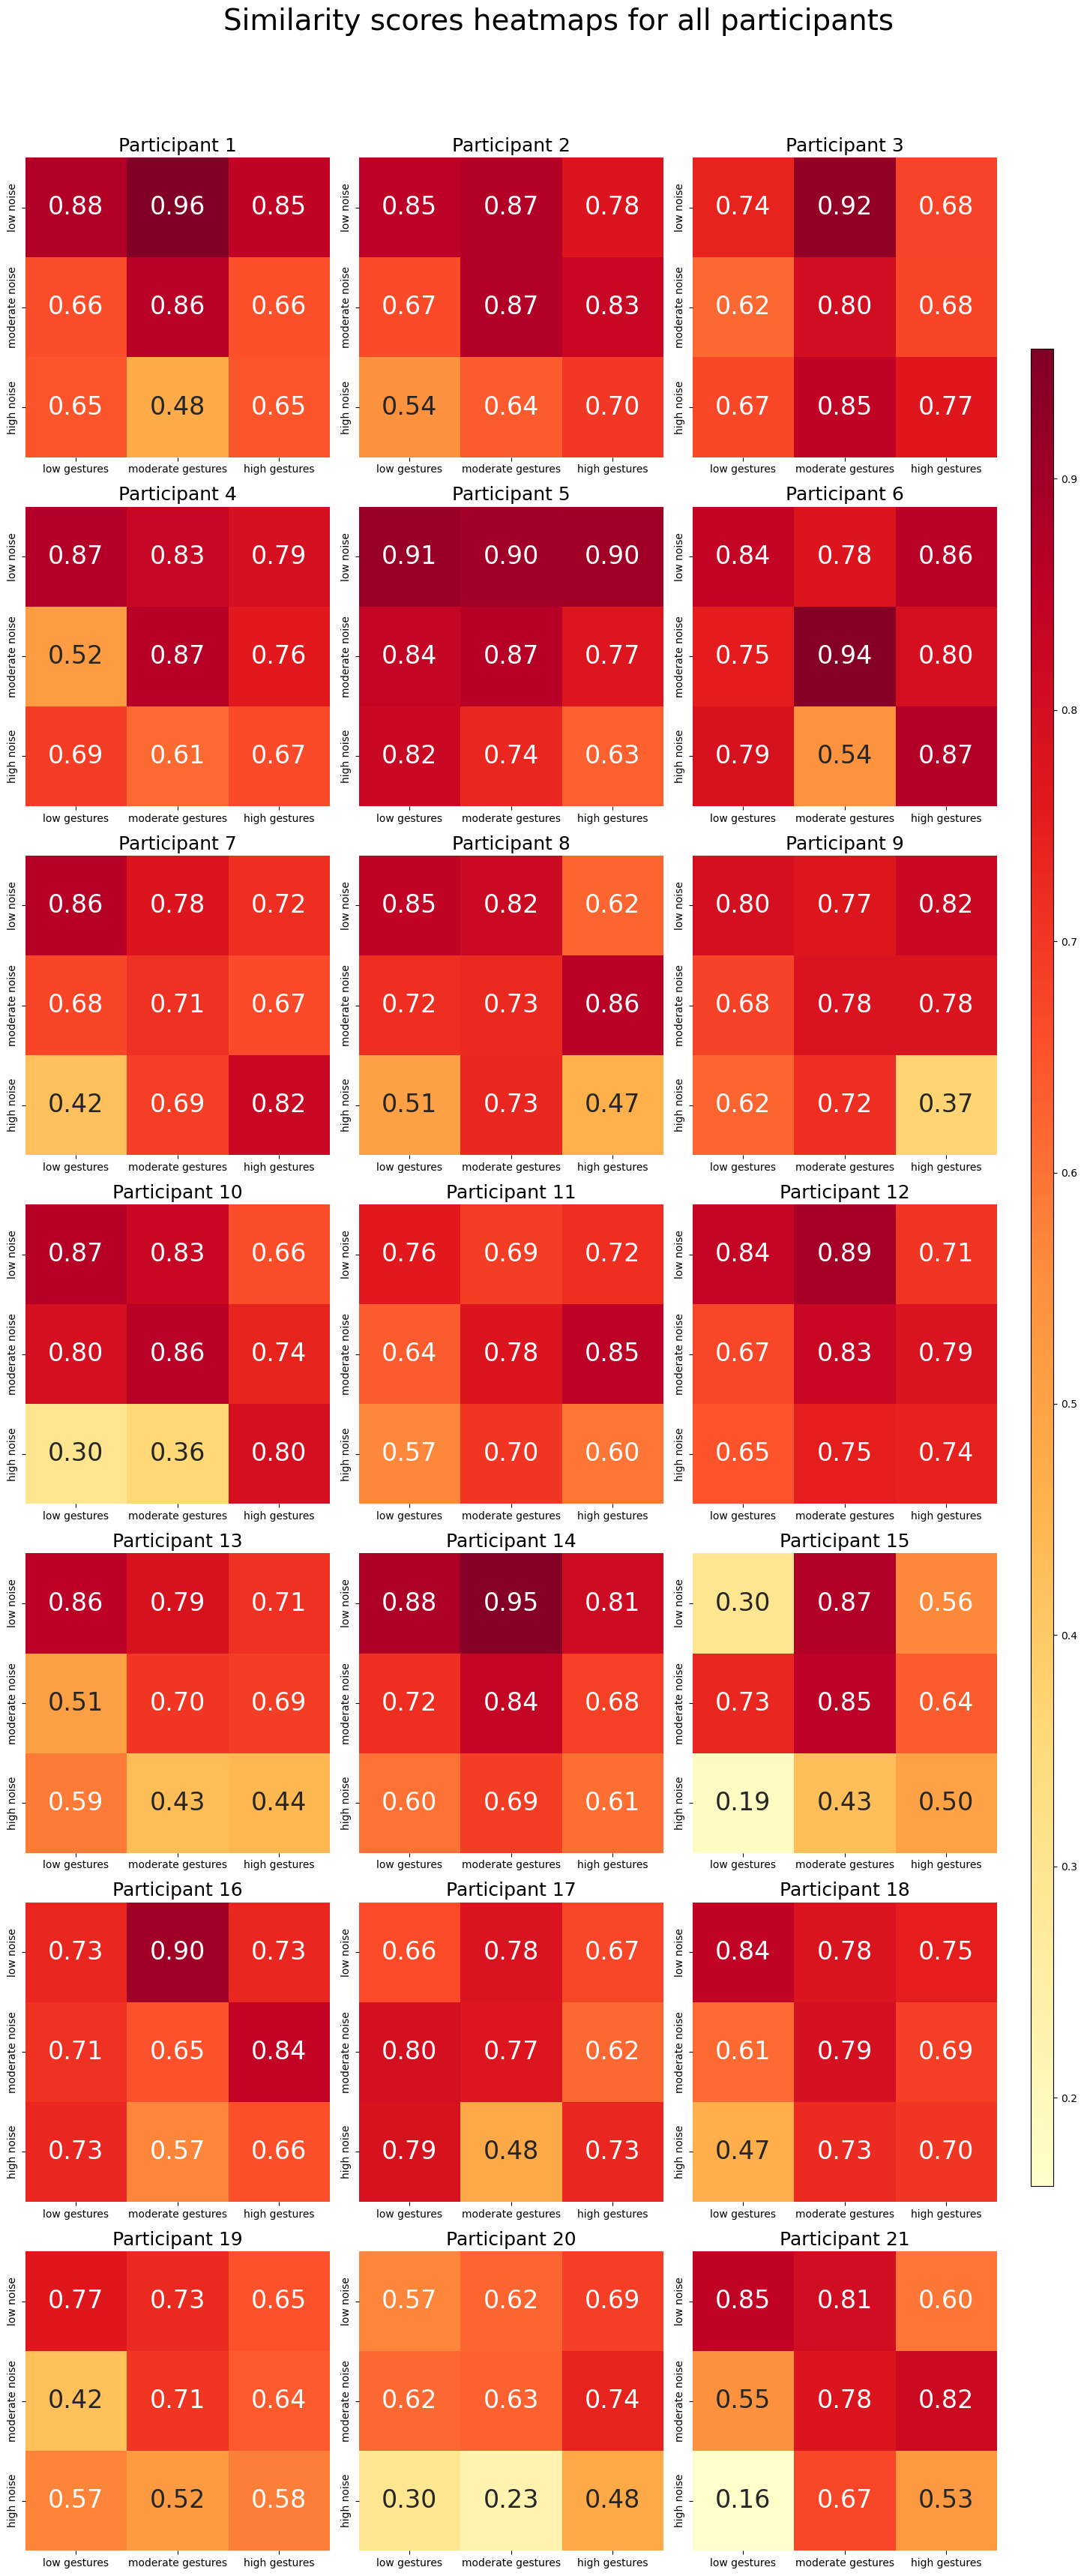

In [22]:
# heatmap axes labels
columns = ["low gestures", "moderate gestures", "high gestures"]
rows = ["low noise", "moderate noise", "high noise"]

# function for plotting heatmap for a participant
def plot_heatmap(ax, participant_id, matrix, vmin, vmax):
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="YlOrRd", xticklabels=columns, yticklabels=rows, cbar=False, vmin=vmin, vmax=vmax, ax=ax, annot_kws={'size': 24})
    ax.set_title(f"Participant {participant_id + 1}", fontsize=18)
    ax.set_xlabel('')
    ax.set_ylabel('')

# retrieving global min and max values across all participants' matrices
all_scores = [calculate_matrix(scores) for scores in participant_similarity_scores.values()]
all_values = np.array([value for matrix in all_scores for row in matrix for value in row])
global_vmin = all_values.min()
global_vmax = all_values.max()

# subplot
fig, axes = plt.subplots(7, 3, figsize=(15, 35))
fig.suptitle("Similarity scores heatmaps for all participants", fontsize=28)
plt.subplots_adjust(top=1)
axes_flat = axes.flatten()

# plotting heatmaps for all participants (with a standardized color scale)
for i, (participant, scores) in enumerate(participant_similarity_scores.items()):
    matrix = calculate_matrix(scores)
    plot_heatmap(axes_flat[i], participant, matrix, vmin=global_vmin, vmax=global_vmax)

# this creates a color bar next to the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=global_vmin, vmax=global_vmax))
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)

# adjust and display
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # because of the colorbar
plt.show()

Average data matrix across all participants:
[[0.78737592 0.82271828 0.72799258]
 [0.66188137 0.79222014 0.74002098]
 [0.55333096 0.59836663 0.63411239]]
The minimum and maximum comprehension averages are: 0.5533309557608196 0.8227182825406393


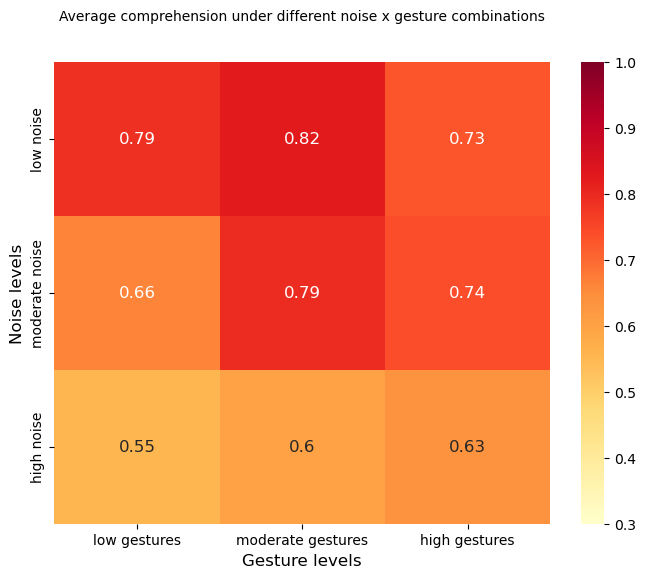

In [23]:
# initializing empty matrix which will get filled up
data_sums = np.zeros((3, 3))

# iterating through each participant's matrix and adding their values to the sums
for scores in participant_similarity_scores.values():
    participant_matrix = calculate_matrix(scores)
    data_sums += np.array(participant_matrix)

# calculating the average
num_participants = len(participant_similarity_scores)
data = data_sums / num_participants

# printing the matrix
print("Average data matrix across all participants:")
print(data)

# retrieving max and min for color bar
vmin, vmax = data.min(), data.max()
print("The minimum and maximum comprehension averages are:", vmin, vmax)

# plotting the average heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap='YlOrRd', cbar=True, vmin=0.3, vmax=1, annot_kws={'size': 12})
plt.title("Average comprehension under different noise x gesture combinations", fontsize=10, pad=30)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["low gestures", "moderate gestures", "high gestures"], fontsize=10)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["low noise", "moderate noise", "high noise"], fontsize=10)
plt.xlabel("Gesture levels", fontsize=12)
plt.ylabel("Noise levels", fontsize=12)
plt.show()